## REFERENCES

https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4

https://docs.sciml.ai/stable/basics/overview/#Overview-of-DifferentialEquations.jl-1


In [36]:
using Plots

## Euler method 

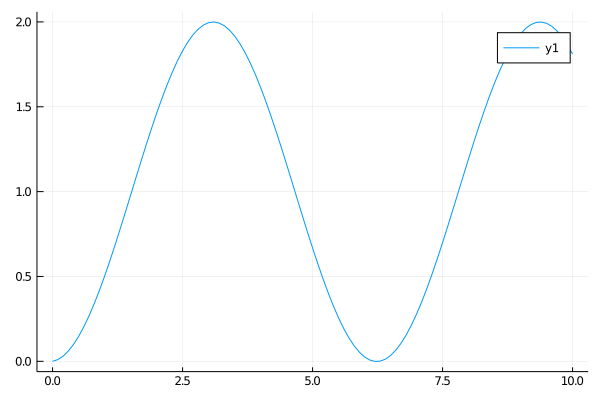

In [311]:
function euler(f, t0, y0, h, n_iter; kwargs...)
    tn = t0
    yn = y0
    t = [t0]
    y = y0
    for i in 1:n_iter
        tn = tn + h
        yn = yn + h * f(tn, yn; kwargs...)
        t = vcat(t, [tn])
        y = vcat(y, yn)
    end
    return (t, y)
end

function test_f(t, y)
    return sin(t)
end

t, y = euler(test_f, 0., 0., 0.1, 100)
plot(t, y)

## SIR model


In [308]:
function f_SIR_model(t, y; beta=0.2, gamma=0.1, N=1000)
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt dIdt dRdt]
end

f_SIR_model (generic function with 1 method)

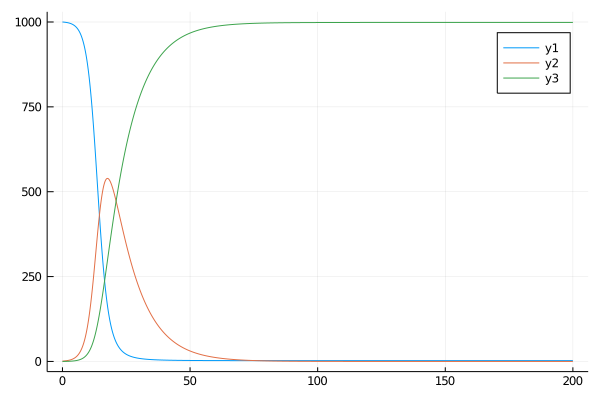

In [329]:
t0 = 0.
y0 = [1000. 1. 0.]
h = 0.1
n_iter = 2000
beta = 0.6   # expected amount of people an infected person infects per day
gamma = 0.1  # the proportion of infected recovering per day (γ = 1/D)
N = 1000     # total population

t, y = euler(f_SIR_model, t0, y0, h, n_iter; beta=beta, gamma=gamma, N=N)
plot(t, y)